# Titanic
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).



## Import the libaries
Let's start by importing the required libraries.

In [32]:
# Import pandas as pd
import pandas as pd

# Import numpy as np
import numpy as np

# Import seaborn as sns
import seaborn as sns

# Import matplotlib as plt
import matplotlib.pyplot as plt

## Getting Started

We start by importing the Titanic Datasets and naming them for our convenience.
"df" will be our training set of data from which we make our assumptions and predictions.
"test_data" will be the final set of data for which we will make our presumptions.

In [35]:
# Load the data
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', index_col = 0)

The `df.info()` function will give us the basic information about the dataset. For any data, it is good to start by knowing its information. Let’s see how it works with our data. Use `describe()` to get a summary statistics of the data.

In [36]:
# View the data
titanic.info()

# Print a description of titanic
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualize the Unique counts
Yes, you can visualize the unique values present in the data. For this, we will be using the seaborn library. You have to call the `sns.countlot()` function and specify the variable to plot the count plot.

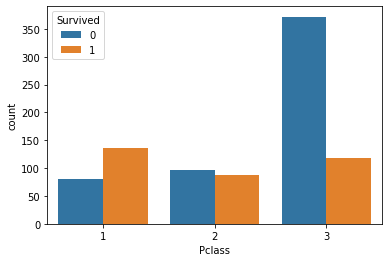

In [48]:
# Plot the distribution of the Pclass colomn
sns.countplot(data = titanic, x = 'Pclass', hue = "Survived");

That’s great! You are doing good. It is as simple as that. Though EDA has two approaches, a blend of graphical and non-graphical will give you the bigger picture altogether.

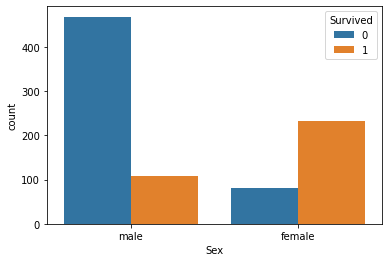

In [49]:
# Plot the distribution of the sex colomn
sns.countplot(data = titanic, x = 'Sex', hue = "Survived");

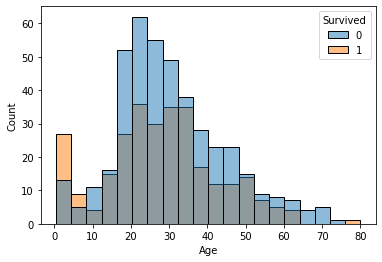

In [50]:
sns.histplot(data = titanic, x = 'Age', hue = "Survived");

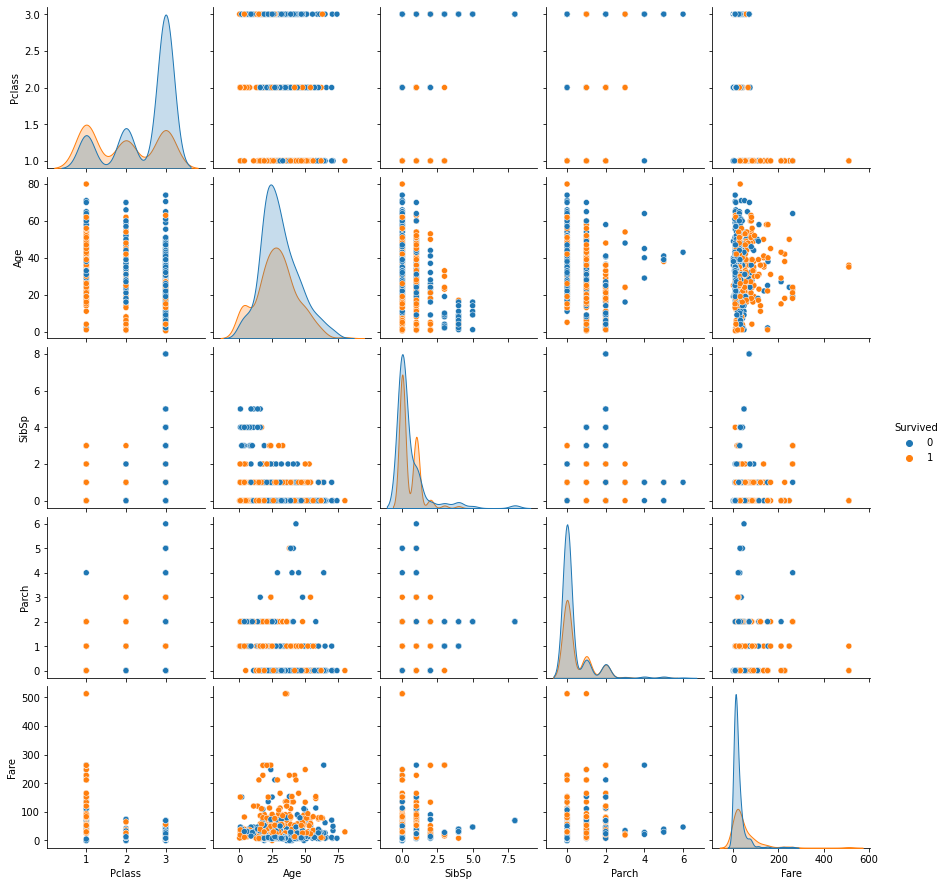

In [53]:
sns.pairplot(titanic, hue = 'Survived')

## Manipulate the data
We then create a new feature "Last_name" created from the first part of the `Name` feature until a comma is hit. This lets us get the full last name as the String is made up of **Last name, Title. First Name**.

Lastly, we sort by this new column.

In [17]:
# Extract the last name from the name colomn
titanic["Last_name"] = titanic["Name"].str.split(",").str[0]

# Sort the data by name
titanic.sort_values("Last_name")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last_name
PassengerId,,,,,,,,,,,,
846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S,Abbing
280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S,Abbott
747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S,Abbott
875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,Abelson
309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C,Abelson
...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S,de Mulder
283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S,de Pelsmaeker
362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C,del Carlo


The `set()` function in this case gives us the amount of unique last names in the training set.

In [18]:
# Calculate the unique names
len(set(titanic["Last_name"]))

667

## Missing Values
For Age, we decided that we wanted the mean age to be seperated by class.
This means that we get the mean age of 1st, 2nd, and 3rd class, and the NaN values of Age will then be decided based on what class the individual was, which gives us a slightly more accurate representation of the mean ages, seeing as the mean age of 1st class is a good deal higher than for 3rd class as we can see in the cell a little further down.

In [19]:
for klass in set(titanic.Pclass):
    df.loc[df.Pclass==klass,"Age_filled"]=df.loc[df.Pclass==klass,"Age"].fillna(df.loc[df.Pclass==klass].Age.mean())

for klass in set(test_data.Pclass):
    test_data.loc[test_data.Pclass==klass,"Age_filled"]=test_data.loc[test_data.Pclass==klass,"Age"].fillna(df.loc[df.Pclass==klass].Age.mean())

df.info()

NameError: name 'df' is not defined

In [ ]:
df[["Pclass", "Age_filled"]].groupby("Pclass").mean()

In [ ]:
df.Age.mean()

For Embarked, we found that a very large number of the passengers embarked from "S" and so we filled out the missing values with that one due to the low amount of NaN values (2).

In [21]:
titanic.value_counts("Embarked")

Embarked
S    644
C    168
Q     77
dtype: int64

In [ ]:
df["Embarked_filled"]=df["Embarked"].fillna(df.Embarked.mode()[0])
test_data["Embarked_filled"]=test_data["Embarked"].fillna(df.Embarked.mode()[0])

Here we see our new dataframe with the newly-added features filled in.
We have not changed the original "Age" or "Embarked" but instead made a copy, named it [X]_filled, and changed the NaN values on those.

In [ ]:
df.info()

## Categorizing
We add a feature named "Type" which denotes whether the individual is a man, woman, or a child. We decided that <15 is the cutoff between child and adult, seeing as this was the 1910's and we found at least one young lady with the title of "Mrs." at the ripe old age of 14. We considered her an outlier but 18 to be too old to be the cutoff in this case.

In [ ]:
df["Type"]=df["Sex"]
for x in df:
    df.loc[(df.Age_filled<15), "Type"]="Child"

test_data["Type"]=test_data["Sex"]
for x in test_data:
    test_data.loc[(test_data.Age_filled<15), "Type"]="Child"

In [23]:
# Print out the head
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last_name
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


Here we get a sense of how many people were in each class, and afterwards, how many in each class survived. Hereafter, we sort and group the survivors by their family name and show whether they're a man, woman, or child, by the above definition.

In [24]:
titanic.groupby("Pclass")["PassengerId"].count()

df.groupby(["Pclass", "Survived"])["PassengerId"].count()

df_survivors=df[df["Survived"]==1]

df_survivors.groupby(["Last_name", "Type"])["Type"].count()

KeyError: 'Column not found: PassengerId'

We then create a new feature, "Relatives", which counts the amount of Siblings/Spouses and Parents/Children for the individual to get the total amount of family, the individual had with them aboard the ship.

In [ ]:
df["Relatives"]=(df["SibSp"]+df["Parch"])
test_data["Relatives"]=(test_data["SibSp"]+test_data["Parch"])

And here we see the final amount of features, we have at our disposal as well as their types and whether they're missing any values.

In [ ]:
df.info()

In [ ]:
# transform Sex to categorical
df["Sex"] = df["Sex"].astype("category")
test_data["Sex"] = test_data["Sex"].astype("category")

In [ ]:
df["Sex"] = df["Sex"].cat.codes
test_data["Sex"] = test_data["Sex"].cat.codes

### Duplicate values

You can use the `df.duplicate.sum()` function to the sum of duplicate value present if any. It will show the number of duplicate values if they are present in the data.

In [7]:
# Find the duplicate rows
df.duplicated().sum()

0

In [8]:
# Find the duplicate names
df.duplicated(subset = ["Name"]).sum()

0

In [9]:
# Find the duplicate tickets
df.duplicated(subset = ["Ticket"]).sum()

210

Well, the function returned ‘0’. This means, there is not a single duplicate value present in our dataset and it is a very good thing to know. However some persons have the same ticket! This is something to investigate

### Unique values in the data

You can find the number of `unique()` values in the particular column using unique() function in python.

In [10]:
# unique values for Pclass
df['Pclass'].unique()

array([3, 1, 2])

In [11]:
# unique values for Survived
df['Survived'].unique()

array([0, 1])

In [12]:
# unique values for Sex
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
# unique values for Age
df['Age'].sort_values().unique()

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan])

In [14]:
# unique values for SibSp
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [15]:
# unique values for Parch
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [16]:
# unique values for Ticket
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [17]:
# unique values for Ticket
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

The `unique()` function has returned the unique values which are present in the data and it is pretty much cool!

### Find the Null values
Finding the null values is the most important step in the EDA. As I told many a time, ensuring the quality of data is paramount. So, let’s see how we can find the null values.

In [6]:
#Find null values
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Oh no, we have some null values in the **Age** and **Cabin** variables. But, don’t worry. We will find a way to deal with them soon.

## Replace the Null values
Hey, we got a `replace()` function to replace all the null values with a specific data. It is too good!

In [7]:
#Replace null values
df.replace(np.nan,'0',inplace = True)

#Check the changes now
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Whoo! That’s awesome. It is very easy to find and replace the null values in the data as shown. I have used 0 to replace null values. You can even opt for more meaningful methods such as mean or median.

In [33]:
df[""]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## Know the datatypes
Knowing the datatypes which you are exploring is very important and an easy process too. Let’s see how it works.

In [8]:
# Datatypes
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age          object
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

That’s it. You have to use the dtypes function for this a shown and you will get the datatypes of each attribute.

## Filter the Data
Yes, you can filter the data based on some logic.

In [9]:
# Filter data
df[df['Pclass'] == 1].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


You can see that the above code has returned only data values that belong to class 1.

## A quick box plot
You can create a box plot for any numerical column using a single line of code.

<AxesSubplot:>

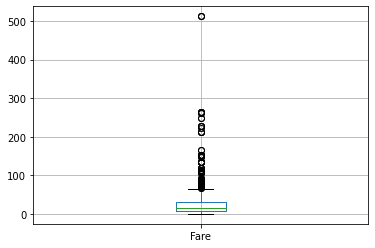

In [46]:
# Boxplot
df[['Fare']].boxplot()

<AxesSubplot:>

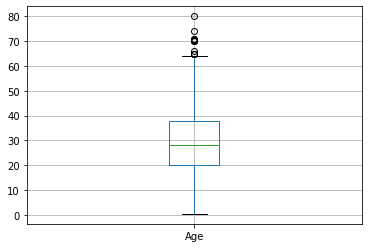

In [45]:
df[['Age']].boxplot()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

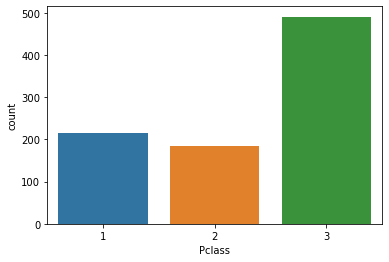

In [34]:
sns.countplot(data = df, x = "Pclass")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

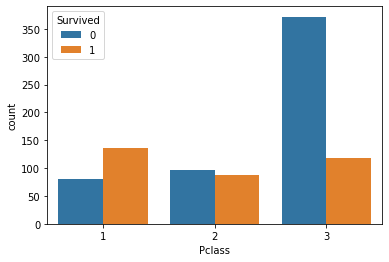

In [35]:
sns.countplot(data = df, x = "Pclass", hue = "Survived")

<AxesSubplot:xlabel='Sex', ylabel='count'>

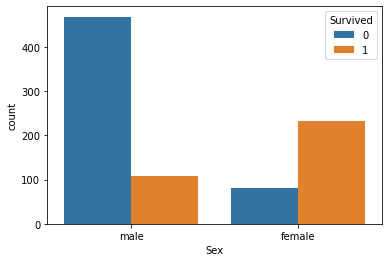

In [32]:
sns.countplot(data = df, x = "Sex", hue = "Survived")

<AxesSubplot:xlabel='count', ylabel='Parch'>

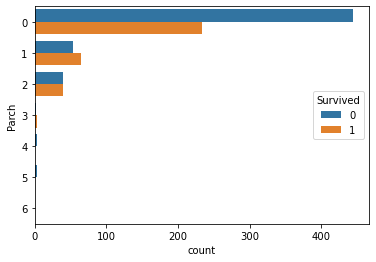

In [36]:
sns.countplot(data = df, y = "Parch", hue = "Survived")

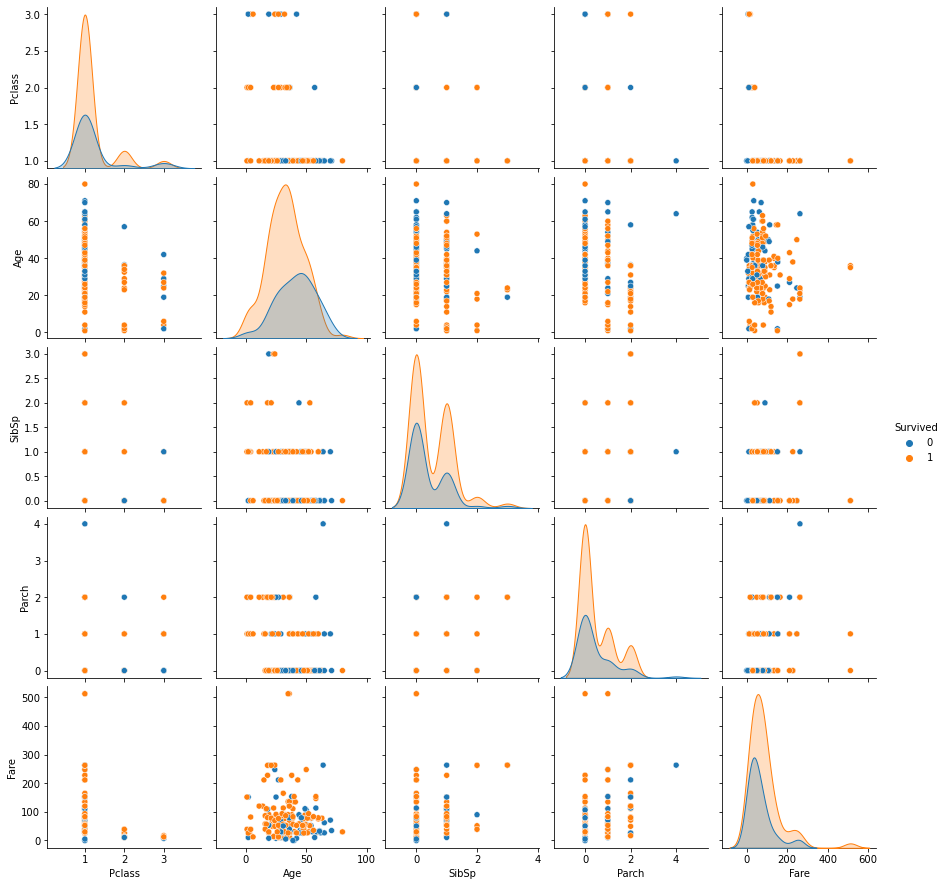

## Correlation Plot - EDA
Finally, to find the correlation among the variables, we can make use of the correlation function. This will give you a fair idea of the correlation strength between different variables.

In [25]:
# Correlation 
df.corr()

,Survived,Pclass,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.549500
SibSp,-0.035322,0.083081,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.159651,0.216225,1.000000


This is the correlation matrix with the range from +1 to -1 where +1 is highly and positively correlated and -1 will be highly negatively correlated. You can even visualize the correlation matrix using seaborn library as shown below.

<AxesSubplot:>

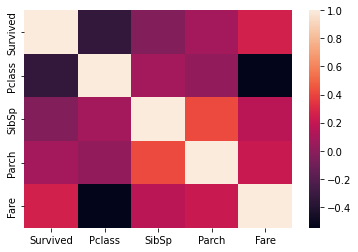

In [26]:
# Correlation plot
sns.heatmap(df.corr())

EDA is the most important part of any analysis. You will get to know many things about your data. You will find answers to your most of the questions with EDA. I have tried to show most of the python functions used for exploring the data with visualizations. I hope you got something from this article.

It is a good idea to

In [24]:
# Create group names
group_names = ["young", "teen", "adult"]

# Create ranges
ranges = [0, 13, 18, np.inf]

# Calculate the names bases on the ranges
age_category = pd.cut(df["Age"], labels = group_names, bins = ranges)

df['Age_Category'] = age_category

<AxesSubplot:xlabel='Age_Category', ylabel='count'>

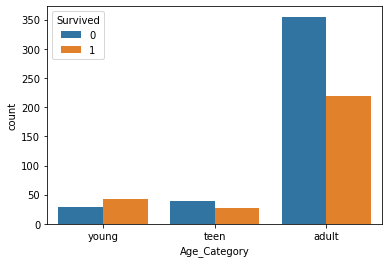

In [28]:
sns.countplot(x = "Age_Category", hue ="Survived", data = df)